<a href="https://colab.research.google.com/github/eugenekk/kaggle_shadow/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1주차 타이타닉

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 각자 작업 환경에 맞는 경로를 지정해주세요. Google Colab과 Jupyter환경에서 경로가 다를 수 있습니다.
path = '/content/drive/MyDrive/Kaggle_shadow/1_titanic'

In [3]:
import os
import pandas as pd

In [4]:
df_train = pd.read_csv(os.path.join(path, 'train.csv'), encoding='utf-8')
df_test = pd.read_csv(os.path.join(path, 'test.csv'), encoding='utf-8')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib 의 기본 scheme 말고 seaborn scheme을 세팅하고, 폰트 크기를 default로 지정해두기
plt.style.use('seaborn')
sns.set(font_scale = 2.5)

#결측데이터를 파악하는데 직관적인 도움을 주는 패키지(그래프 시각화 패키지)
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. 데이터셋 확인
- 결측치를 확인하고 데이터의 생김새를 파악한다

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## train 데이터의 feature 와 label 확인
- feature : Pclass, Age, SibSp, Parch, Fare (왜 이것만 피쳐로 쓰는가?)
- 예측 label : Survived
---
- Survived : 생존여부 : 0/1 : integer
- Pclass : 티켓클래스 : 1/2/3 (categorical) : integer
- Sex : 성별 : male/female (binary) : string
-Age : 나이 : continous : integer
- sibSp : 함께 탑승한 형제/배우자 수 : quantitative : integer
- Parch : 함께 탑승한 부모/아이의 수 : quantitative : integer
- Ticket : 티켓번호 : alpabet + integer : string
- fare : 탑승료 : continuous : float
- cabin : 객실번호 : alphabet + integer : float
- Embarked : 탑승항구 : C/Q/S : string









In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1.1 Null data check

In [10]:
for col in df_train.columns : 
    nullPercent = 100 * df_train[col].isnull().sum()/df_train[col].shape[0]
    msg = f'column : {col:11s} Percent of NaN value : {nullPercent}'
    print(msg)

column : PassengerId Percent of NaN value : 0.0
column : Survived    Percent of NaN value : 0.0
column : Pclass      Percent of NaN value : 0.0
column : Name        Percent of NaN value : 0.0
column : Sex         Percent of NaN value : 0.0
column : Age         Percent of NaN value : 19.865319865319865
column : SibSp       Percent of NaN value : 0.0
column : Parch       Percent of NaN value : 0.0
column : Ticket      Percent of NaN value : 0.0
column : Fare        Percent of NaN value : 0.0
column : Cabin       Percent of NaN value : 77.10437710437711
column : Embarked    Percent of NaN value : 0.2244668911335578


In [11]:
for col in df_test.columns:
    nullPercent = 100*df_test[col].isnull().sum()/df_test[col].shape[0]
    msg = f'column : {col:11s} Percent of NaN value : {nullPercent}'
    print(msg)

column : PassengerId Percent of NaN value : 0.0
column : Pclass      Percent of NaN value : 0.0
column : Name        Percent of NaN value : 0.0
column : Sex         Percent of NaN value : 0.0
column : Age         Percent of NaN value : 20.574162679425836
column : SibSp       Percent of NaN value : 0.0
column : Parch       Percent of NaN value : 0.0
column : Ticket      Percent of NaN value : 0.0
column : Fare        Percent of NaN value : 0.23923444976076555
column : Cabin       Percent of NaN value : 78.22966507177034
column : Embarked    Percent of NaN value : 0.0


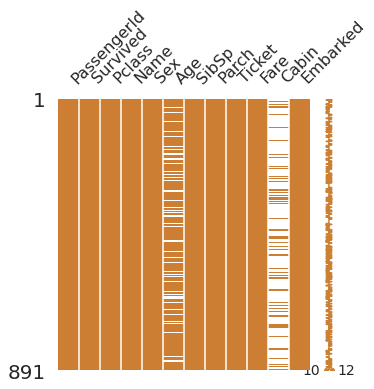

In [12]:
# data.iloc[0:5, 5:8] # 첫 5개 행과 5th, 6th, 7th 열만
# iloc를 안해도 된다
# color 파라미터는 RGB를 지정해주는 것이다.
msno.matrix(df=df_train.iloc[:,:], figsize=(5,5), color=(0.8,0.5,0.2))

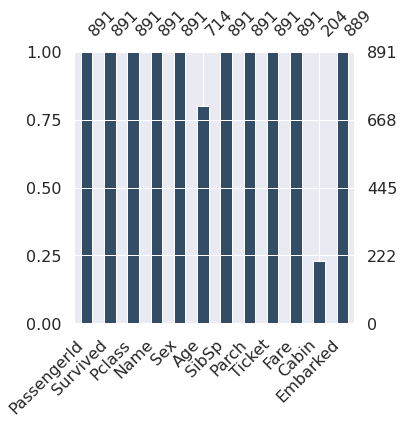

In [13]:
msno.bar(df=df_train.iloc[:,:], figsize=(5,5), color =(0.2,0.3,0.4))

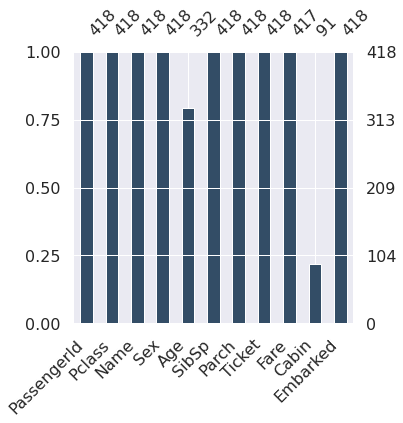

In [14]:
# iloc를 안해도 된다 
msno.bar(df=df_test, figsize=(5,5), color=(0.2,0.3,0.4))

## 1.2 Target Lable 확인하기
- 예측 Target Label 이 어떤 특징을 가지고 있는지 확인
- 지금은 0/1의 binary classification
- 가지고 있는 데이터의 0/1 데이터 분포에 따라 모델의 평가방법이 달라진다

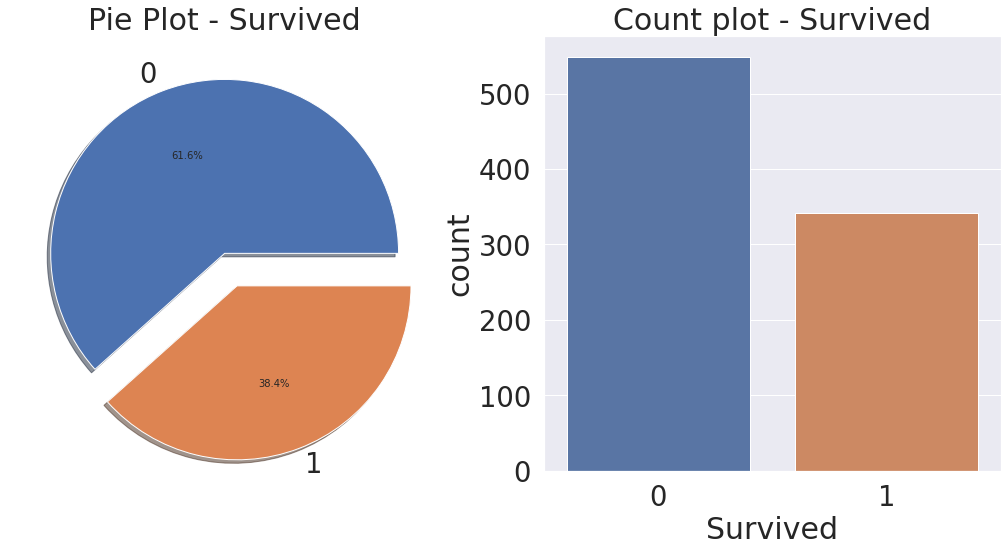

In [15]:
# 한번에 여러 그래프를 보여주기 위해 사용되는 코드
f, ax = plt.subplots(1,2, figsize=(18,8)) #행 1줄, 열 2줄

# 파이차트 그리기(explode : 파이차트 갈라지는 크기, autopct : 파이차트 숫자값 소수점 몇자리까지?)
df_train['Survived'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie Plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 38.4%가 생존
- target label의 분포가 제법 균일하다.
- 불균일한 경우, 예를들어 100중 1:99 정도인 경우는 만약 모델이 모두 1이라고 예측을 해도 정확도가 99%가 된다. 0을 찾는 문제라면, 이 모델은 원하는 결과를 줄 수 없으므로 정확도를 다른 방법을 찾던가 전처리를 해야함. 이 모델은 그렇지 않으므로 계속 진행

# 2. 탐색적 데이터분석(Exploratory data analysis)
- 여러 feature 들을 개별적으로 분석하고, 상관관계를 파악한다.
- 여러 시각화 툴을 활용하여 insight를 얻는다

## 2.1 Pclass
- Pclass는 ordinal, 서수형 데이터이다.
- 카테고리컬 데이터, 순서가 있는 데이터 타입
- 먼저 Pclass 에 따른 생존률의 차이를 살펴보자 : groupby , pivot
- Pclass, Survived 열을 가져오기 -> Pclass로 groupby -> 각 Pclass마다 Survived의 0/1값을 count -> 평균내기 = 생존률

In [16]:
# 전체 개수
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [17]:
# 생존자 수 (합계면 1값만 카운트 되므로)
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [18]:
# 동일한 과정을 좀 더 시각화 해본다면
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


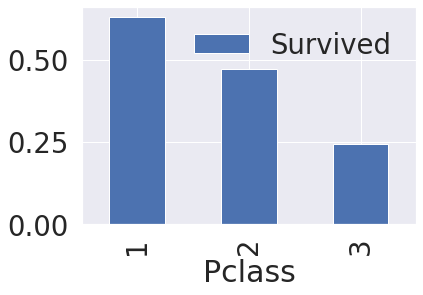

In [19]:
# groupby 객체에 mean을 하면 생존률을 얻을 수있다.
# 무엇이 가장 중요한지에 파악하기 위해서는 sort_values 이 필요하다.
# 기본적으로 오름차순으로 정렬이 되는데, 내림차순으로 정렬이 되려면 다음과 같이 ascending을 입력

df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index =True).mean().sort_values(by='Survived', ascending =False).plot.bar()

- Pclass가 좋을수록(1등석) 생존률이 높다.

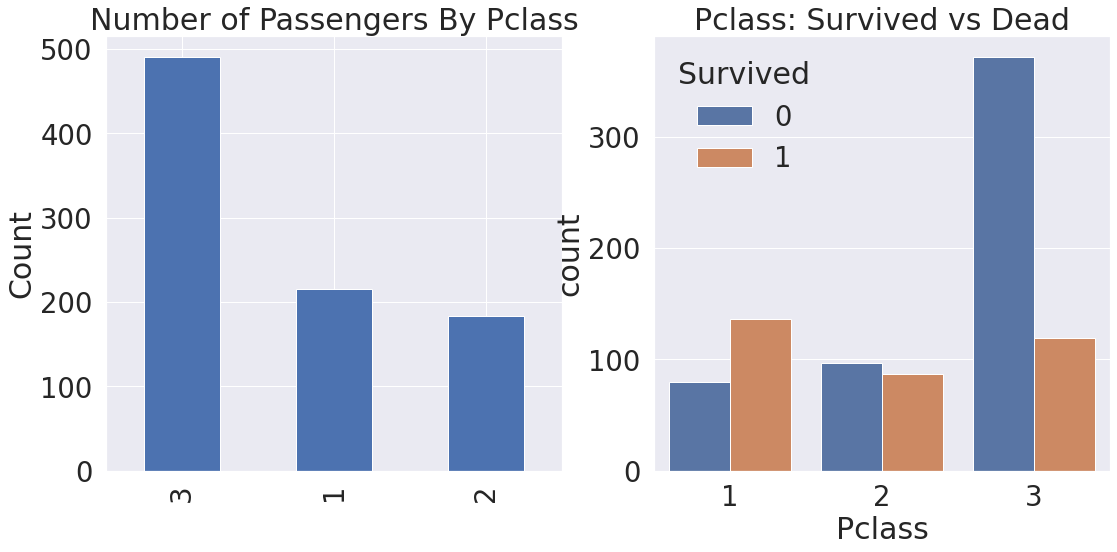

In [20]:
# 특정 라벨에 따른 개수를 확인해보기
f, ax = plt.subplots(1,2, figsize = (18,8))

df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

# hue 범주 써주기
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

plt.show()

- 클래스가 높을 수록 생존 확률이 높은 걸 확인할 수 있다.
- 생존에 Pclass 가 큰 영향을 미친다고 생각할 수 있다

## 2.2 Sex
- 성별에 따른 생존률 확인해보기

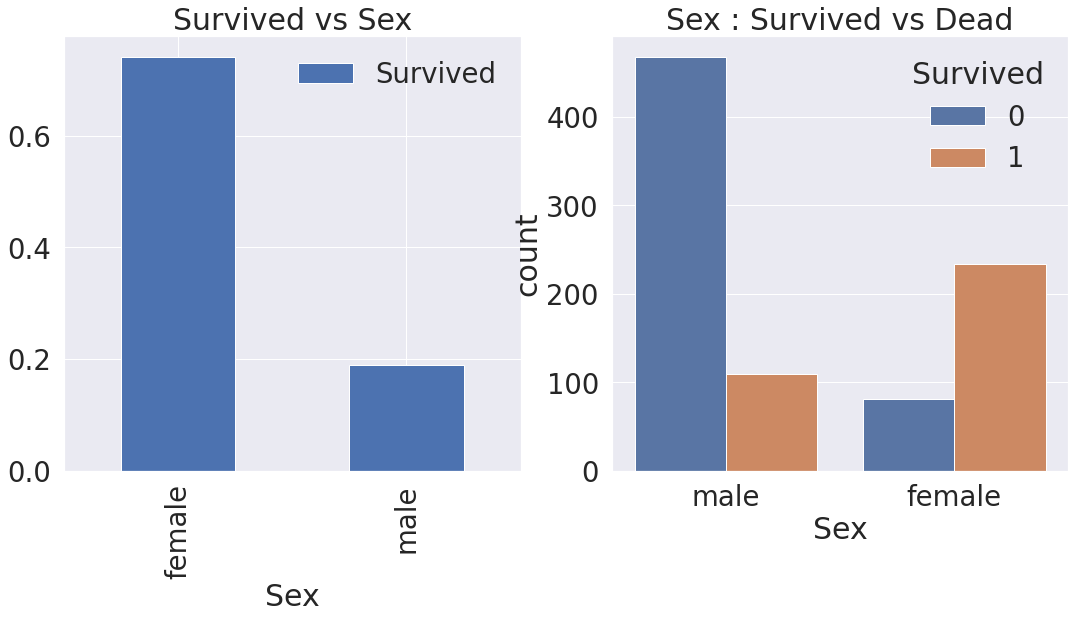

In [21]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train[["Sex", "Survived"]].groupby(['Sex'], as_index = True).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs Sex")

sns.countplot('Sex', hue="Survived", data=df_train, ax=ax[1])
ax[1].set_title("Sex : Survived vs Dead")

plt.show()

In [22]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- 여자가 생존확률이 높다.
- 생존여부와 관련이 깊은 중요한 feature

## 2.3 Sex & Pclass
- sex, pclass 두개를 동시에 생존이 어떻게 달라지는지 확인하기

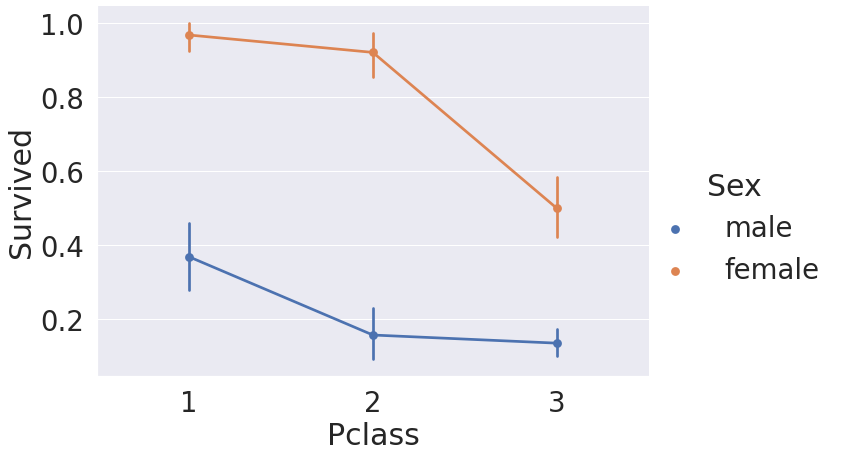

In [23]:
sns.factorplot('Pclass', 'Survived', hue="Sex", data=df_train, size = 6, aspect = 1.5)

- 클래스는 1-> 2-> 3
- 여자 남자 상관없이 클래스가 높을 수록 생존 확률 높다
- 모든 클래스에서 여자 -> 남자

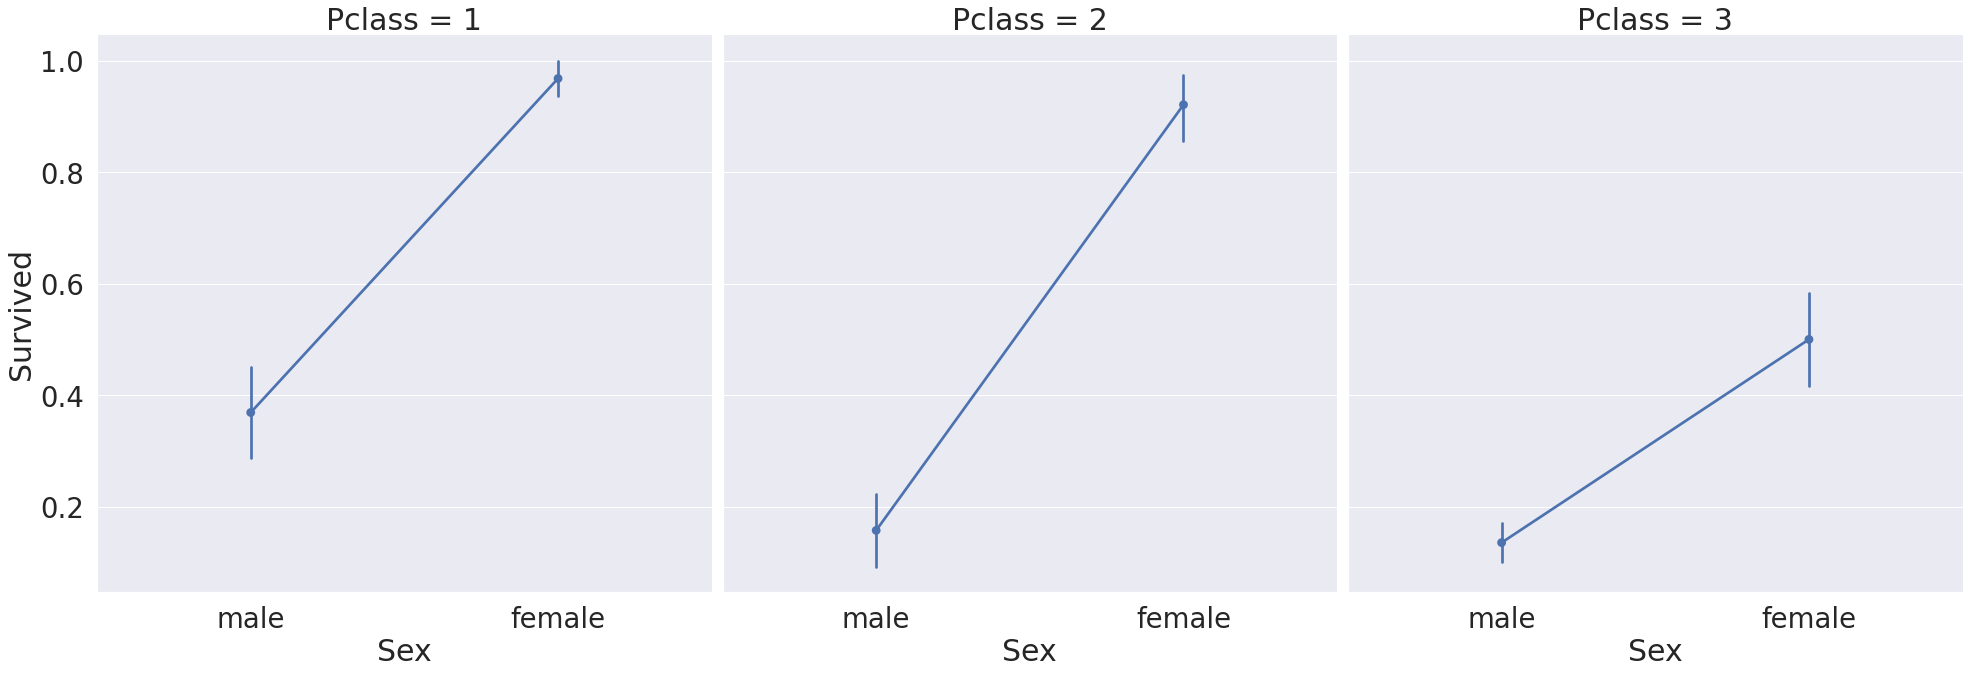

In [24]:
sns.factorplot(x='Sex', y='Survived', col = "Pclass", data=df_train, saturation = .05, size = 9, aspect =1)

## 2.4 Age

In [25]:
print(f"제일 나이 많은 탑승객: {df_train['Age'].max()}")
print(f"제일 어린 탑승객 : {df_train['Age'].min()}")
print(f"탑승객 나이 평균 : {df_train['Age'].mean()}")

제일 나이 많은 탑승객: 80.0
제일 어린 탑승객 : 0.42
탑승객 나이 평균 : 29.69911764705882


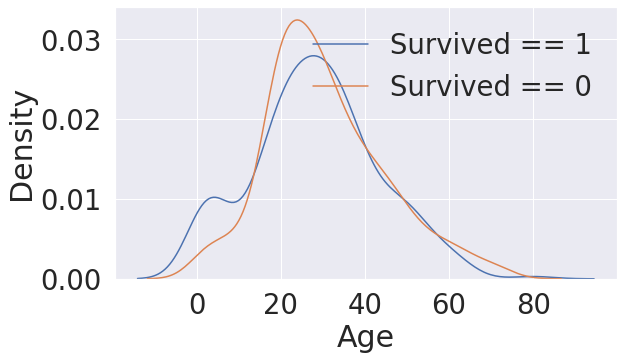

In [26]:
f, ax = plt.subplots(1,1, figsize = (9,5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'])
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'])

plt.legend(['Survived == 1', 'Survived == 0'])

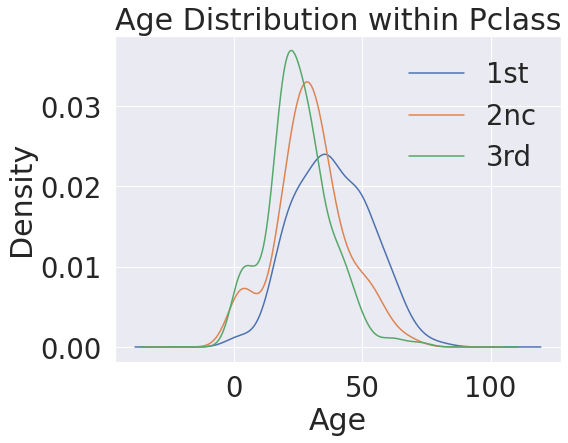

In [27]:
plt.figure(figsize =(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = "kde")
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title("Age Distribution within Pclass")
plt.legend(['1st', '2nc', '3rd'])

- Pclass가 높을 수록, 나이 많은 사람의 비중이 커진다.
- 나이대가 변하면서 생존률이 어떻게 되는지 볼수 있다.
- 나이 범위를 점점 넓혀가면서 생존률을 확인해 보자

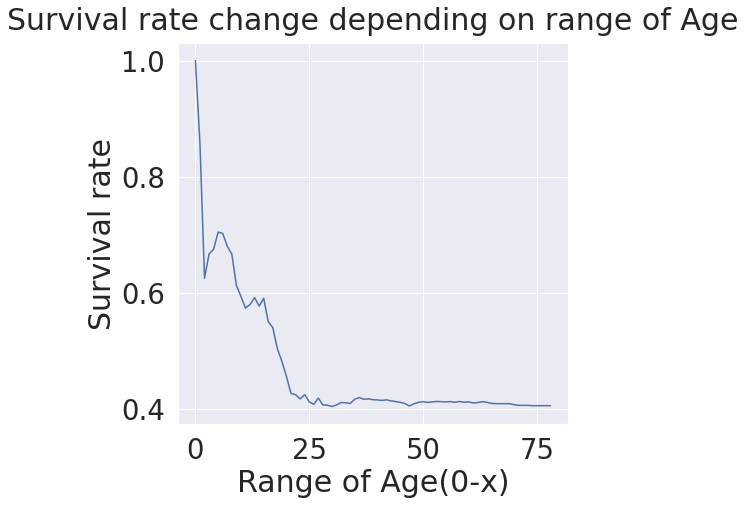

In [28]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train["Age"] < i ]['Survived'].sum() / len(df_train[df_train['Age'] < i ]['Survived']))

plt.figure(figsize = (7,7))
plt.plot(cummulate_survival_ratio)
plt.title("Survival rate change depending on range of Age", y = 1.02)
plt.ylabel("Survival rate")
plt.xlabel("Range of Age(0-x)")
plt.show()

- 나이가 어릴 수록 생존률이 높다

## 2.5 Pclass, Sex, Age
- 지금까지 본 변수들에 대해 합쳐서 보기
- 이를 쉽게 그려주는 것이 seaborn violinplot
- x축은 우리가 나눠서 보고싶어하는 case(Pclass, Sex)를 나타내고
- y축은 보고싶어하는 distribution (Age) 이다

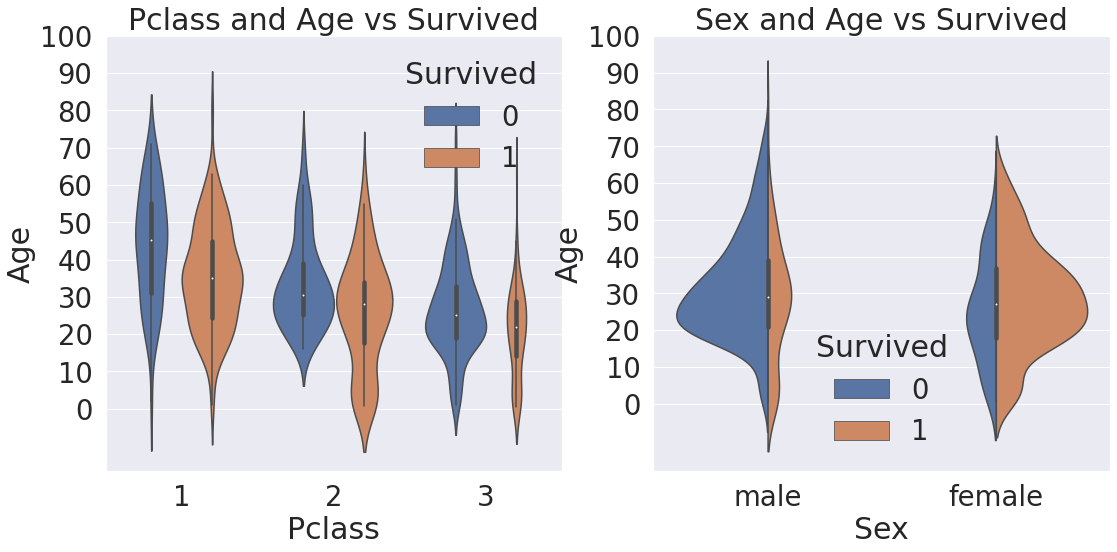

In [29]:
f, ax = plt.subplots(1,2, figsize = (18, 8))
sns.violinplot("Pclass", "Age", hue ="Survived", data = df_train, scale = 'count', spli= True, ax = ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue = "Survived", data = df_train, scale = 'count', split = True, ax = ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110, 10))
plt.show()

- 왼쪽 그림은 Pclass 별로 Age의 distribution이 어떻게 다른지, 
- 오른쪽 그림은 Sex 별로 Age의 distribution 이 어떻게 다른지 보여주는 그래프
- 생존만 봤을때 (갈색) 모두 클래스에서 나이가 어릴수록, 생존을 많이 했다.
- 오른쪽 그림에서는 명확하게 여자가 더 생존을 많이 했음을 알 수 있다.

## 2.6 Embarked
- 탑승한 항구를 나타냄

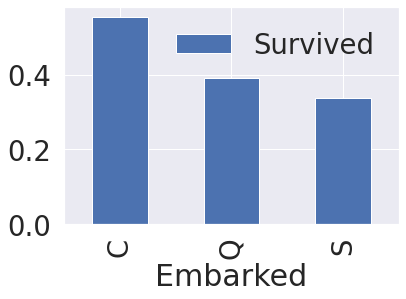

In [30]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

- C가 가장 높은 생존률
- 큰 영향을 끼치는 feature는 아니어 보이지만, 사용할 것

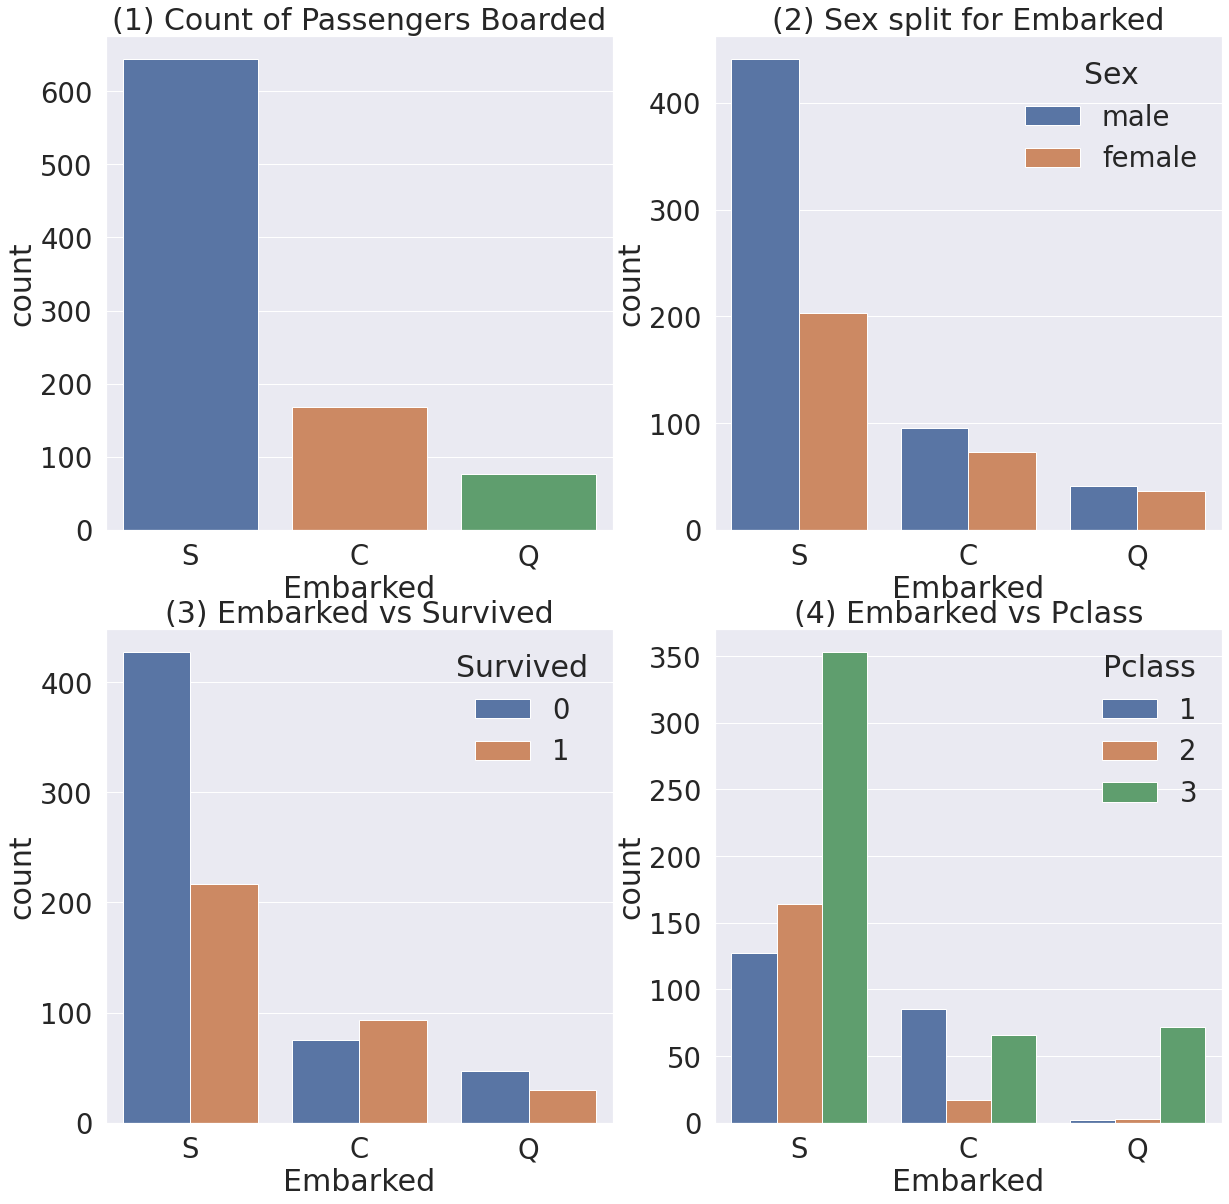

In [31]:
f, ax = plt.subplots(2,2, figsize = (20, 20))

sns.countplot("Embarked", data = df_train, ax = ax[0,0])
ax[0,0].set_title('(1) Count of Passengers Boarded')

sns.countplot("Embarked", hue = "Sex", data = df_train, ax = ax[0,1])
ax[0,1].set_title("(2) Sex split for Embarked")

sns.countplot("Embarked", hue = "Survived", data = df_train, ax = ax[1,0])
ax[1,0].set_title("(3) Embarked vs Survived")

sns.countplot("Embarked", hue = "Pclass", data=df_train, ax = ax[1,1])
ax[1,1].set_title("(4) Embarked vs Pclass")

plt.show()

- [0,0]그래프 : 전체적으로 S에서 가장 많은 사람이 탑승
- [0,1]그래프 : C와 Q는 남녀 비율이 비슷한데, S는 남자가 더많다.
- [1,0]그래프 : 생존확률은 S가 많이 낮다
- [1,1]그래프 : Pclass 별로 나누어서 확인해보니, C가 생존확률이 높은 것은 1st가 많아서, S가 낮은 것은 3rd가 많아서라고 볼수 있다.

## 2.7 Family = SibSp(형제자매) + Parch (부모자녀)
- SibSp 와 Parch를 합쳐서 Family 로 한꺼번에 분석해보자

In [32]:
# FamilySize라는 피쳐 생성
# 자기 자신 포함해야하므로 1을 더한다

df_train['FamilySize'] = df_train["SibSp"] + df_train["Parch"] + 1 
df_test['FamilySize'] = df_test["SibSp"] + df_test["Parch"] + 1

In [33]:
print(f'Max of FamilySize : {df_train["FamilySize"].max()}')
print(f'min of FamilySize : {df_train["FamilySize"].min()}')

Max of FamilySize : 11
min of FamilySize : 1


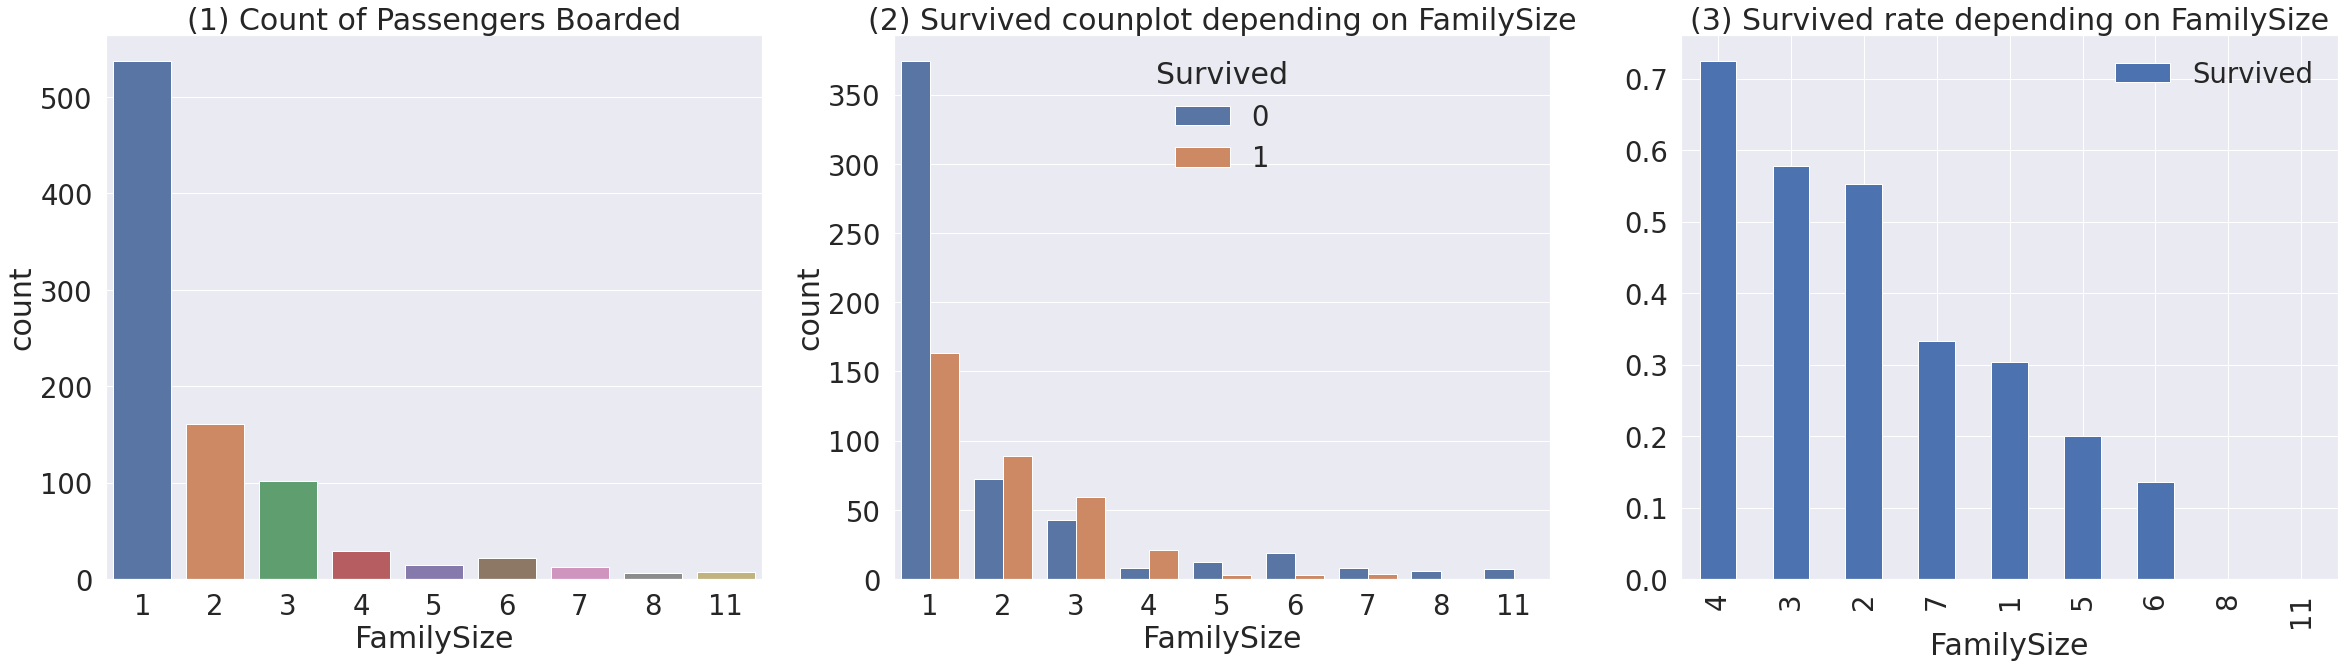

In [34]:
f, ax = plt.subplots(1,3, figsize = (40, 10))

sns.countplot("FamilySize", data = df_train, ax = ax[0])
ax[0].set_title("(1) Count of Passengers Boarded")

sns.countplot("FamilySize", hue = "Survived", data = df_train, ax = ax[1])
ax[1].set_title("(2) Survived counplot depending on FamilySize")

df_train[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index = True).mean().sort_values(by="Survived", ascending=False).plot.bar(ax=ax[2])
ax[2].set_title("(3) Survived rate depending on FamilySize")

plt.show()

- (1) 가족의 크기가 1~11 까지 있고, 대부분이 1명이다.
- (2),(3) 가족의 크기에 따른 생존비교 시
- (3) 가족이 4명인 경우가 가장 생존 확률이 높다. 

## 2.8 Fare
- 탐승요금 continuous feature

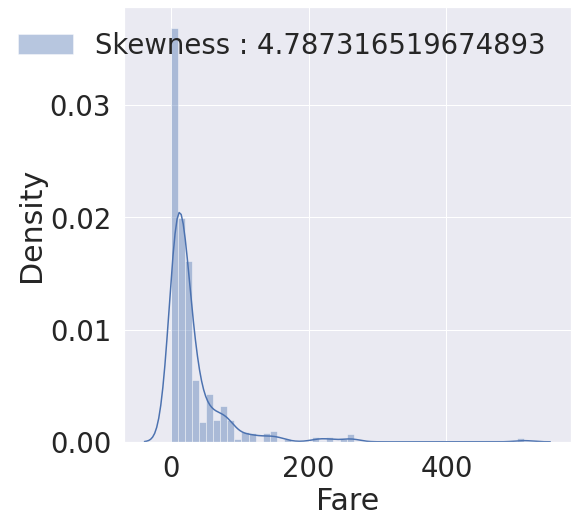

In [35]:
f, ax = plt.subplots(1,1, figsize= (8,8))
sns.distplot(df_train['Fare'], label = f"Skewness : {df_train['Fare'].skew()}", ax = ax)
plt.legend(loc = 'best')

- 매우 비대칭이다
- 이대로 모델에 넣어준다면 자칫 모델 학습이 잘못될 수 있다.
- 몇개 없는 Outlier의 영향을 줄이기 위해 Fare 값에 Log를 취해서 사용함
- map / apply 함수를 사용

In [36]:
# test 데이터에 있는 Fare null 값을 평균값으로 치환
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
# 로그 취하기
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

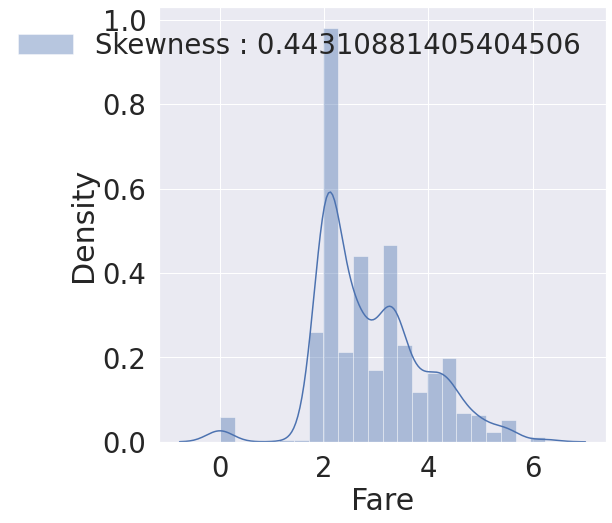

In [37]:
f, ax = plt.subplots(1,1, figsize = (8,8))
g = sns.distplot(df_train["Fare"], label = f"Skewness : {df_train['Fare'].skew()}", ax = ax)
g = g.legend(loc="best")

- log를 취하니, 비대칭성이 많이 사라짐
- 이런 작업은 feature engineering 에 해당하는 내용 : 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나 새로운 feature를 추가하는 것이 feature engineering

## 2.9 Cabin
- 이 feature는 대략 80%rk null이므로, 중요한 정보를 찾아내기 어렵다
- 제외시키도록 하겠다

## 2.10 Ticket
- 이 feature는 null 값은 없지만, 그냥.. String이라서 따로 작업을 해야함..
- 새로운 아이디어가 있다면 ticket에서 정보를 잡아내서 새로운 feature로 사용해도 됨

## 3. Feature Engineering
- 가장먼저 null data 채우기
- 해당 feature들의 특징을 파악하여 적합한 값으로 채워야함
- train 뿐 아니라 test 데이터도 항상 동일하게 적용해 주어야함

## 3.1 Fill Null
## 3.1.1 Fill Null in Age Using title
- Age 에는 null data 가 177개나 있다. 
- 이를 채울수 있는 아이디어로는 title + statistics 를 사용해 보겠다.
- 영어에서는 이름에 Miss / Mrr / Mrx 같은 title이 존재-> 이를 사용할 것
- pandas series 에는 data 를 string 으로 바꿔주는 str method, 거기에 정규표현식을 적용하게 하는 extrant method 가 있다. 이를 사용해서 title을 추출하고 initial columns에 저장하겠다.  

In [38]:
# 이름에서 영문을 빼자
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [39]:
df_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [40]:
df_test['Initial'].head()

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Initial, dtype: object

In [41]:
pd.crosstab(df_train['Initial'], df_train["Sex"]).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [42]:
df_train["Initial"].replace(["Mlle", 'Mme', "Ms", "Dr", "Major", "Lady", "Countess","Jonkheer", "Col", "Rev", "Capt", "Sir", "Don", "Dona"], 
                            ["Miss", "Miss", 'Miss', "Mr", "Mr", "Mrs", "Mrs", "Other", "Other", "Other", "Mr", "Mr", "Mr", "Mr"],
                            inplace = True)
df_test["Initial"].replace(["Mlle", 'Mme', "Ms", "Dr", "Major", "Lady", "Countess","Jonkheer", "Col", "Rev", "Capt", "Sir", "Don", "Dona"], 
                            ["Miss", "Miss", 'Miss', "Mr", "Mr", "Mrs", "Mrs", "Other", "Other", "Other", "Mr", "Mr", "Mr", "Mr"],
                            inplace = True)

In [43]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


- 여성과 관계있는 Mixx , Mr, Mrs가 생존률이 높은 것을 볼 수 있습니다.

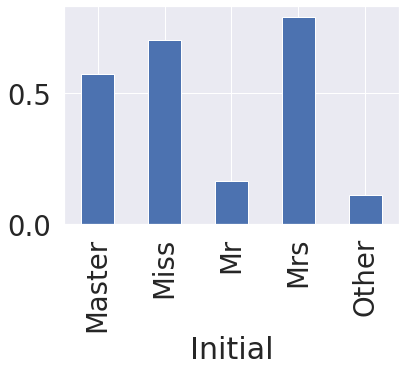

In [44]:
df_train.groupby("Initial")['Survived'].mean().plot.bar()

- 이제 본격적으로 Null 을 채울 것입니다.
- null data를 채우는 방법에는 통계를 사용하거나/ 그 안에서 머신러닝을 돌려서 적절한 값을 찾아내거나 하는 두가지의 방법이 있다.
- 이번에는 통계를 사용해볼 것
- 주의할 점은 train data의 통계값을 그대로 사용해야 함

In [45]:
df_train.groupby("Initial").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


- Age의 평균을 이용해서 null 값을 채운다

In [46]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'), 'Age'] = 46

## 3.1.2 Fill Null in Embarked

In [47]:
print(f"Embarked has {sum(df_train['Embarked'].isnull())}")

Embarked has 2


- Embarked에는 null 값이 2개 있고, S가 가장 많이 나온 값이므로 S로 채운다

In [48]:
df_train['Embarked'].fillna("S", inplace = True)

## 3.2 Change Age(Continuous to Categorical)
- Age는 현재 연속피쳐(Continuous feature) 이다.
- 이대로 사용해도 되지만, 몇개의 그룹으로 나누어(10대, 20대 등) Category 화 할 수 있다.
- Continuous를 Categorical로 바꾸면 데이터의 손실이 발생하지만, 다양한 방법을 소개하는 것이 목적이므로 Categorical로 진행함

In [49]:
# 첫번째 방법
df_train["Age_cat"] = 0
df_train.loc[df_train["Age"]<10, "Age_cat"] = 0
df_train.loc[(10<= df_train["Age"])&(df_train["Age"]<20), "Age_cat"] = 1
df_train.loc[(20<= df_train["Age"])&(df_train["Age"]<30), "Age_cat"] = 2
df_train.loc[(30<= df_train["Age"])&(df_train["Age"]<40), "Age_cat"] = 3
df_train.loc[(40<= df_train["Age"])&(df_train["Age"]<50), "Age_cat"] = 4
df_train.loc[(50<= df_train["Age"])&(df_train["Age"]<60), "Age_cat"] = 5
df_train.loc[(60<= df_train["Age"])&(df_train["Age"]<70), "Age_cat"] = 6
df_train.loc[70<= df_train["Age"], "Age_cat"] = 7

df_test["Age_cat"] = 0
df_test.loc[df_test["Age"]<10, "Age_cat"] = 0
df_test.loc[(10<= df_test["Age"])&(df_test["Age"]<20), "Age_cat"] = 1
df_test.loc[(20<= df_test["Age"])&(df_test["Age"]<30), "Age_cat"] = 2
df_test.loc[(30<= df_test["Age"])&(df_test["Age"]<40), "Age_cat"] = 3
df_test.loc[(40<= df_test["Age"])&(df_test["Age"]<50), "Age_cat"] = 4
df_test.loc[(50<= df_test["Age"])&(df_test["Age"]<60), "Age_cat"] = 5
df_test.loc[(60<= df_test["Age"])&(df_test["Age"]<70), "Age_cat"] = 6
df_test.loc[70<= df_test["Age"],"Age_cat"] = 7

In [50]:
# 두번째방법
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

df_train['Age_cat_2'] = df_train["Age"].apply(category_age)

In [51]:
print("1번방법, 2번방법 둘다 같은 결과인가요?", (df_train["Age_cat"] == df_train["Age_cat_2"]).all())

1번방법, 2번방법 둘다 같은 결과인가요? True


In [52]:
# 같은 것 확인 후 중복 컬럼 제거
df_train.drop(["Age", "Age_cat_2"], axis =1, inplace =True)
df_test.drop(['Age'], axis = 1, inplace =True)

## 3.3 Change Initial, Embarked and Sex (String -> Numericla)
- 현재 Initial은 Mr, Mrs, Miss, Master, Other 총 5개로 이루어져 있다.
- 이런 카테고리컬 데이터는 컴퓨터가 알아볼 수 있도록 수치화시켜야한다

In [53]:
df_train["Initial"] = df_train["Initial"].map({"Master": 0, "Miss": 1, "Mr": 2, "Mrs": 3, "Other": 4})
df_test["Initial"] = df_test['Initial'].map({"Master": 0, "Miss": 1, "Mr": 2, "Mrs": 3, "Other": 4})

- Embarked도 C, S, Q로 이루어져있다 
- 특정 칼럼에 어떤 값들이 있는지 확인해보기

In [54]:
df_train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [55]:
df_train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
df_train["Embarked"] = df_train["Embarked"].map({"C": 0, "Q": 1, "S": 2})
df_test["Embarked"] = df_test["Embarked"].map({"C": 0, "Q": 1, "S": 2})

- Sex 도 female, male 두 종류 이므로 바꿔주기

In [57]:
df_train["Sex"] = df_train["Sex"].map({"female": 0, "male": 1})
df_test["Sex"] = df_test["Sex"].map({"female": 0, "male": 1})

- 이제 각 feature 간의 상관관계를 보자
- 피어슨 상관관계 (Pearson Correlation) 을 구하면 (-1, 1) 사이의 값을 얻을 수 있는데,
- -1에 갈 수록 음의 상관관계
- 1에 갈 수록 양의 상관관계
- 0은 관게가 없음을 의미한다
- 우리는 여러개의 feature들을 하나의 matrix로 상관계수를 보려한다

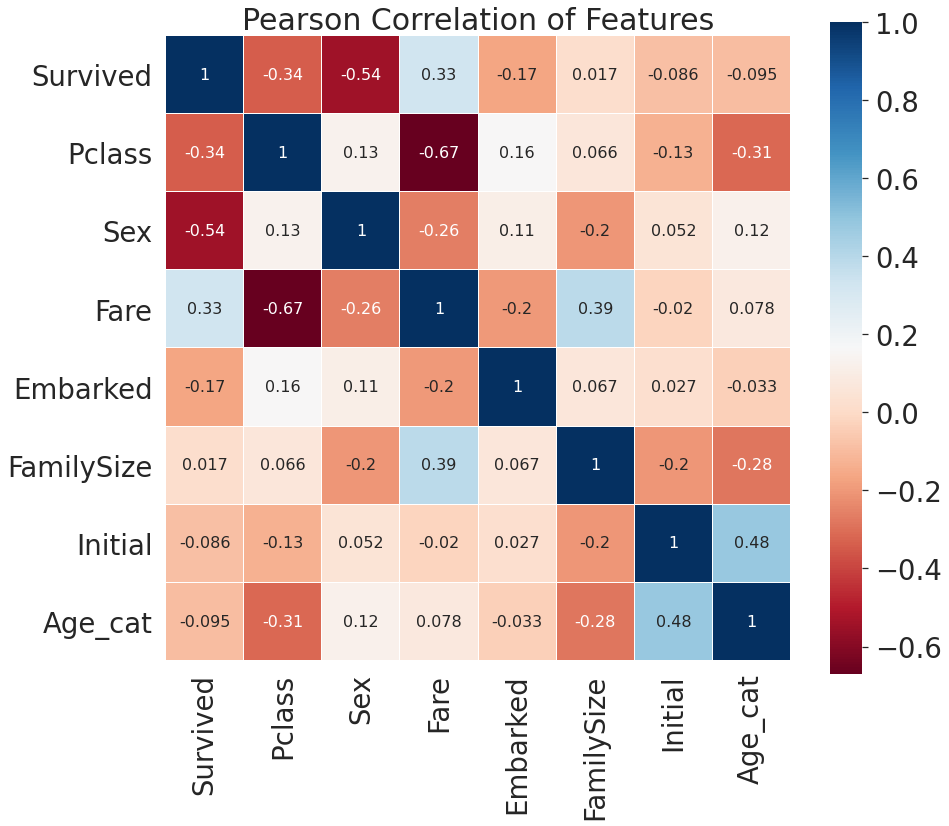

In [59]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize = (14,12))
plt.title("Pearson Correlation of Features")

sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True, annot_kws = {'size': 16})

del heatmap_data

- 0.2 이상 값은 의미가 있다고 본다
- Sex, Pclass 가 Survived와 상관관계가 있다.
- fare, Embarked 도 어느정도 있다.
- 서로 feature끼리 강한 상관관계는 없다.

## 3.4 One-hot encoding on Initial and Embarked
- 숫자로 만든 카테고리컬 데이터를 원핫 인코딩 해준다

In [60]:
df_train = pd.get_dummies(df_train, columns = ['Initial'], prefix = 'Initial')
df_test = pd.get_dummies(df_test, columns = ['Initial'], prefix = 'Initial')

In [61]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [62]:
df_train = pd.get_dummies(df_train, columns=["Embarked"], prefix = "Embarked")
df_test = pd.get_dummies(df_test, columns = ["Embarked"], prefix = "Embarked")

In [63]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


## 3.5 Drop columns 
- 필요한 칼럼만 두고 나머지를 버린다

In [64]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace = True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [65]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


## 4. Building ML and prediction using the traditional model
- sklearn을 이용해 머신러닝 모델을 만들자
- 타이타닉 문제는 생존/비생존 (Survived) 이진 분류이다 Binary classification 
- 랜덤포레스트 : 결정트리기반 모델
- 여러 결정 트리들을 앙상블한 모델이다.

In [66]:
# importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier

# 모델의 평가를 위해 사용하는 패키지
from sklearn import metrics

# train set 나누기
from sklearn.model_selection import train_test_split

## 4.1 Preparation : Split dataset into train, valid, test
- 가장 먼저 학습에 사용할 데이터와 target label을 분리한다 (x값 y값 분리)

In [67]:
X_train = df_train.drop('Survived', axis = 1).values
target_label = df_train['Survived'].values
X_test = df_test.values

- Train 데이터를 train/valid 데이터로 분리

In [71]:
X_tr, X_vld, y_tr, y_vld  = train_test_split(X_train, target_label, test_size = 0.3, random_state = 2018)

- 랜덤포레스트 분류기의 여러개의 파라미터들을 어떻게 설정하느냐에 따라서 성능이 달라진다.
- 파라미터 튜닝은 시간, 경험, 알고리즘에 대한 이해가 필요하다
- 일단은 기본 세팅을 그대로 사용한다.
- 모델을 만들고
- fit 학습시킨다.
- 따로 짤라뒀던 valid를 넣어서 예측을 시키고
- 나온 예측값과 짤라둔 y_vld 정답과 비교해서 정확도를 도출한다

## 4.2 Model generation and prediction

In [72]:
model = RandomForestClassifier() 
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [73]:
print(f"총 {y_vld.shape[0]} 중에 {100*metrics.accuracy_score(prediction, y_vld)}")

총 268 중에 82.83582089552239


- 정확도는 82.8%

## 4.3 Feature Importance
- 학습된 모델은 feature Importance를 가지게 되는데, 우리는 이것을 확인해서, 지금 만든 모델이 어떤 feature에 영향을 많이 받았는지를 확인 할 수 있다.
- 즉 피쳐별 가중치를 알 수 있다.

In [75]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index = df_test.columns)

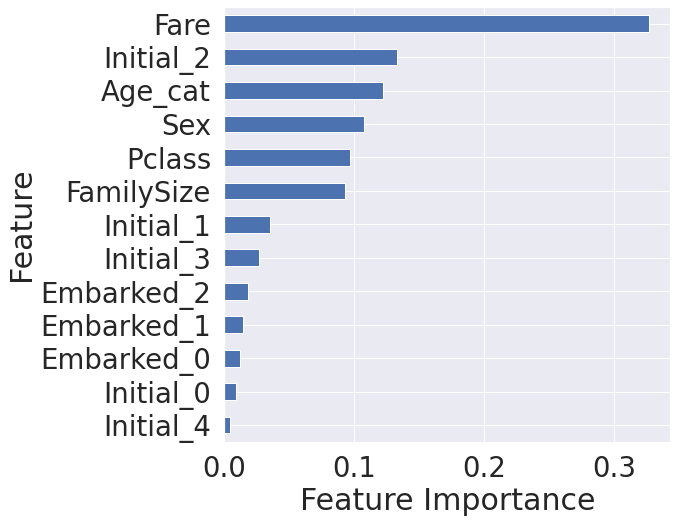

In [77]:
plt.figure(figsize = (8,8))
Series_feat_imp.sort_values(ascending = True).plot.barh()

plt.xlabel("Feature Importance")
plt.ylabel("Feature")

plt.show()

- 만든 모델은 Fare 가 가장 큰 영향력을 가진다.
- 다른 모델을 사용한다면 Feature Importance가 다르게 나올 것이다.
- Feature Importance를 보고 정확도가 높은 모델을 얻기위해 Feature Selection 을 할 수도 있고, 제거를 할 수 있다.

## 4.4 Prediction on Test set
- 이제 모델이 학습하지 않았던 Test 셋을 모델에 주어서, 생존여부를 예측해본다
- 이 결과는 실제로 제출용이므로 결과는 learderboard 에서 확인할 수 있다.
- 캐글에서 받은 gender_submission.csv 파일을 읽어서 제출준비를 한다.

In [79]:
submission = pd.read_csv(os.path.join(path, 'gender_submission.csv'), encoding = 'utf-8')

In [80]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [81]:
prediction = model.predict(X_test)

In [82]:
submission["Survived"] = prediction

In [84]:
submission.to_csv(os.path.join(path, 'my_first_submission.csv'), index = False)